### Name: Kevin Alvarez
### SID: 862131623
### CS105 - Final Project
### Topic: Movies

#### ===============================================================================================================
#### ===============================================================================================================
### Data Gathering:

In [1]:
import pandas as pd
import requests
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import re
import math
from bs4 import BeautifulSoup as bs

### Read the csv file that contains the top 10 box office movies of every year from 1975 to 2019.

In [2]:
df1 = pd.read_csv("blockbuster-top_ten_movies_per_year_DFE_copy_.csv")

df1

,audience_freshness,poster_url,rt_audience_score,rt_freshness,rt_score,2015_inflation,adjusted,genres,Genre_1,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,release_date,studio,title,worldwide_gross,year
0,90,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181,NaN,NaN,NaN,NaN,Avengers: Endgame,NaN,2019
1,88,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,NaN,NaN,NaN,The Lion King,NaN,2019
2,92,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,NaN,NaN,NaN,NaN,Frozen II,NaN,2019
3,95,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129,NaN,NaN,NaN,NaN,Spider-Man: Far from Home,NaN,2019
4,45,NaN,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,NaN,NaN,NaN,NaN,Captain Marvel,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,53,http://resizing.flixster.com/J85B30Wmahzrgw0Bm...,3.2,63,6.2,338.88%,"$216,842,095.62",Romance\r\nDrama,Romance,Drama,NaN,6.3,109,5.0,R,13-Mar-75,Columbia Pictures,Shampoo,"$49,407,734.00",1975
444,60,http://resizing.flixster.com/XFNfAAKeokqanZJOB...,3.2,56,6.2,338.88%,"$161,741,515.00",Western\r\nFamily\r\nComedy,Western,Family,Comedy,6.2,100,8.0,G,1-Jul-75,Walt Disney Productions,The Apple Dumpling Gang,"$36,853,000.00",1975
445,77,http://resizing.flixster.com/V6M1TKucdKIV1pTF3...,3.6,0,0.0,338.88%,"$152,174,306.67",Drama\r\nWestern\r\nWar,Drama,Western,War,6.4,103,10.0,PG,20-Dec-75,Universal Pictures,The Other Side of the Mountain,"$34,673,100.00",1975
446,82,http://resizing.flixster.com/coMRFsl2YBbDwXYVs...,3.4,89,6.7,338.88%,"$183,599,406.33",Mystery\r\nCrime\r\nComedy,Mystery,Crime,Comedy,7.1,113,6.0,G,21-May-75,United Artists,The Return of the Pink Panther,"$41,833,347.00",1975


#### Check for any duplicates in the Top 10 Box Office Dataset

In [3]:
df1[df1.duplicated()]

,audience_freshness,poster_url,rt_audience_score,rt_freshness,rt_score,2015_inflation,adjusted,genres,Genre_1,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,release_date,studio,title,worldwide_gross,year
447,67,http://resizing.flixster.com/cyLfP1xi9FRaJZSBo...,3.2,74,6.8,31.26%,"$535,885,534.32",Thriller\r\nSci-Fi\r\nDrama,Thriller,Sci-Fi,Drama,6.7,106,7.0,PG-13,2-Aug-02,Touchstone,Signs,"$408,247,917.00",2002


In [4]:
df1 = df1.drop(index=447)

#### Fix any titles in df1 DataFrame that do not match the titles on IMDB (df2)

In [5]:
dict_mov = {"Mission Impossible - Fallout":'Mission: Impossible - Fallout','Mission Impossible - Rogue Nation':'Mission: Impossible - Rogue Nation',
                                        'Harry Potter and the Deathly Hallows - Part 2':'Harry Potter and the Deathly Hallows: Part 2','Harry Potter and the Deathly Hallows - Part 1':'Harry Potter and the Deathly Hallows: Part 1',
                                        'WALL-E':'WALL·E', 'Star Wars Episode III: Revenge of the Sith': 'Star Wars: Episode III - Revenge of the Sith',
                                        'X2':'X2: X-Men United','Star Wars Episode II: Attack of the Clones':'Star Wars: Episode II - Attack of the Clones',
                                        'Star Wars Episode I: The Phantom Menace': 'Star Wars: Episode I - The Phantom Menace',
                                        'Bram Stoker\'s Dracula': "Dracula",'"Crocodile" Dundee II': 'Crocodile Dundee II', 'The Naked Gun: From the Files of Police Squad!': 'The Naked Gun: from the Files of Police Squad!',
                                        '"Crocodile" Dundee': 'Crocodile Dundee','Out Of Africa': 'Out of Africa', 'The Karate Kid, Part II': 'The Karate Kid Part II',
                                        'Star Wars Episode VI: Return of the Jedi':'Star Wars: Episode VI - Return of the Jedi', 'Raiders of the Lost Ark': 'Indiana Jones and the Raiders of the Lost Ark',
                                        'Star Wars Episode V: The Empire Strikes Back': 'Star Wars: Episode V - The Empire Strikes Back',
                                        'Star Wars': 'Star Wars: Episode IV - A New Hope', 'Aloha, Bobby and Rose': 'Aloha Bobby and Rose',"Seven":"Se7en"}

df1 = df1.replace({"title":dict_mov})

#### Read the smaller dataset from IMDB into df2 DataFrame

In [6]:
df2 = pd.read_csv("Smaller_title_basics.csv")

In [7]:
df2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama
1,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
2,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
3,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
4,tt0019996,movie,Hongxia,Hongxia,0,2011,\N,94,Action
...,...,...,...,...,...,...,...,...,...
278514,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama
278515,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
278516,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
278517,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


#### Make sure the years in df1 match df2

In [8]:
df2.loc[df2["primaryTitle"] == "300", "startYear"] = 2007
df2.loc[df2["primaryTitle"] == "Porky's", "startYear"] = 1982
df2.loc[df2["primaryTitle"] == "Superman II", "startYear"] = 1981
df2.loc[df2["primaryTitle"] == "To Fly!", "startYear"] = 1976
#df2 = df2.drop(index=[4404657,8065416,6562844,7708383])


#### Transfer the titles from df2 that match the titles & years in df1 into a new DataFrame called new_df2

In [9]:
temp = []
for x in range(0,len(df1)):
    temp.append(df2[(df2["primaryTitle"] == df1.at[x,"title"]) & (df2["startYear"] == df1.at[x,"year"])])

new_df2 = pd.concat(temp, ignore_index=False)
new_df2 = new_df2.reset_index(drop=True)
new_df2[new_df2.duplicated()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


#### Run a loop that goes through new_df1 DataFrame and assigns it the titleID & Genres from the new_df2 DataFrame that has the same title/year

In [10]:
new_df1 = df1
new_df1["titleID"] = ""

for x in range(0,len(new_df1)):
    new_df1.at[x,"titleID"] = new_df2[(new_df2["primaryTitle"] == new_df1.at[x,"title"]) & (new_df2["startYear"] == new_df1.at[x,"year"])]["tconst"].item()
    new_df1.at[x,"genres"] = new_df2[(new_df2["primaryTitle"] == new_df1.at[x,"title"]) & (new_df2["startYear"] == new_df1.at[x,"year"])]["genres"].item()


#### Added two new columns the DataFrame

In [11]:
new_df1["Director"] = ""
new_df1["Budget"] = ""


### *NOTE*: These two Web Scrapping blocks below takes a while to execute (9 min). I went ahead and ran this, then saved the DataFrame which has the gathered information from the web scrapping into a new CSV file(new_movie_file.csv).
### You can either uncomment these blocks & wait or skip these cell blocks and go to the cell below these blocks.

#### Below is the Web Scrapping that I did to grab the Director, Actor, Box Office, Budget, Studio, Rating system, and IMDB rating and transfer it to the new_df1 DataFrame

In [12]:
#URL = 'https://www.imdb.com/title/'


#for temp in range(0,len(new_df1)):
#    req = requests.get(URL + new_df1.iloc[temp]["titleID"] + '/')
#    soup = bs(req.text, 'html.parser')
  
    
#    actor = soup.find_all("a", {"class":"StyledComponents__ActorName-y9ygcu-1 eyqFnv", "data-testid":"title-cast-item__actor"})

#    director = soup.find_all("ul", {"class", "ipc-metadata-list ipc-metadata-list--dividers-all StyledComponents__CastMetaDataList-y9ygcu-10 cbPPkN ipc-metadata-list--base"})
#    budget = soup.find_all("li", {"role":"presentation","class":"ipc-metadata-list__item BoxOffice__MetaDataListItemBoxOffice-sc-40s2pl-2 gwNUHl", "data-testid":"title-boxoffice-budget"})
#    world_box = soup.find_all("li", {"role":"presentation","class":"ipc-metadata-list__item BoxOffice__MetaDataListItemBoxOffice-sc-40s2pl-2 gwNUHl","data-testid":"title-boxoffice-cumulativeworldwidegross"})

#    imdb = soup.find_all("div", {"data-testid": "hero-rating-bar__aggregate-rating__score","class":"AggregateRatingButton__Rating-sc-1ll29m0-2 bmbYRW"})

#    rated = soup.find_all("div", {"class": "TitleBlock__TitleMetaDataContainer-sc-1nlhx7j-2 hWHMKr"})
#    studio = soup.find_all("li", {"class": "ipc-metadata-list__item ipc-metadata-list-item--link","data-testid":"title-details-companies"})
    

#    try:
#        new_df1.at[temp,"Main Actor"] = actor[0].text
#        new_df1.at[temp,"Director"] = director[0].li.div.ul.li.a.text
#        new_df1.at[temp,"Budget"] = budget[0].div.ul.li.span.text
#        new_df1.at[temp,"worldwide_gross"] = world_box[0].div.ul.li.span.text
#        new_df1.at[temp,"imdb_rating"] = imdb[0].span.text
#        new_df1.at[temp,"rating"] = rated[0].ul.li.next_sibling.span.text
#        new_df1.at[temp,"studio"] = studio[0].div.ul.li.a.text
        
#    except:
#        pass

#### Below is Web Scrapping for the #1 movie critically of every year

In [13]:
#new_df1["Top Movie According to Critics"] = ""


#count=(3*23)
#moveOn = 0

#req = requests.get("https://bestlifeonline.com/best-movie-every-year/")
#soup = bs(req.text, 'html.parser')
#top_movie = soup.find_all("div", {"class":"title no_digits"})

#for temp in range(0,len(new_df1)):
#    new_df1.at[temp,"Top Movie According to Critics"] = top_movie[count].i.text
#    moveOn += 1
#    if ((moveOn) > 9):
#        moveOn = 0
#        count -= 1

In [14]:
#new_df1.to_csv('/home/csmajs/kalva050/2.0_Project_cs105/new_movie_file.csv', index = False)

#### ================================================================================================================
#### ================================================================================================================
### Data Cleaning Section:

In [15]:
# Go to this block if you skip the web scrapping blocks
# If you uncommented the blocks above you can comment this block out
new_df1 = pd.read_csv("new_movie_file.csv")

In [16]:
new_df1.head(1)

,audience_freshness,poster_url,rt_audience_score,rt_freshness,rt_score,2015_inflation,adjusted,genres,Genre_1,Genre_2,...,release_date,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics
0,90,NaN,NaN,94,NaN,NaN,NaN,"Action,Adventure,Drama",NaN,NaN,...,NaN,Marvel Studios,Avengers: Endgame,"$2,797,501,328",2019,tt4154796,Anthony Russo,"$356,000,000 (estimated)",Robert Downey Jr.,Parasite


In [17]:
new_df1.dtypes

audience_freshness                  int64
poster_url                         object
rt_audience_score                 float64
rt_freshness                        int64
rt_score                          float64
2015_inflation                     object
adjusted                           object
genres                             object
Genre_1                            object
Genre_2                            object
Genre_3                            object
imdb_rating                       float64
length                              int64
rank_in_year                      float64
rating                             object
release_date                       object
studio                             object
title                              object
worldwide_gross                    object
year                                int64
titleID                            object
Director                           object
Budget                             object
Main Actor                        

In [18]:
new_df1.columns

Index(['audience_freshness', 'poster_url', 'rt_audience_score', 'rt_freshness',
       'rt_score', '2015_inflation', 'adjusted', 'genres', 'Genre_1',
       'Genre_2', 'Genre_3', 'imdb_rating', 'length', 'rank_in_year', 'rating',
       'release_date', 'studio', 'title', 'worldwide_gross', 'year', 'titleID',
       'Director', 'Budget', 'Main Actor', 'Top Movie According to Critics'],
      dtype='object')

#### Drop unnecessary columns 

In [19]:
new_df1 = new_df1.drop(columns=["poster_url","rt_audience_score","rt_score","2015_inflation","Genre_1","Genre_2",
                               "Genre_3","adjusted","release_date"])
new_df1.head()

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics
0,90,94,"Action,Adventure,Drama",8.4,181,NaN,PG-13,Marvel Studios,Avengers: Endgame,"$2,797,501,328",2019,tt4154796,Anthony Russo,"$356,000,000 (estimated)",Robert Downey Jr.,Parasite
1,88,52,"Adventure,Animation,Drama",6.8,118,NaN,PG,Walt Disney Pictures,The Lion King,"$1,667,635,327",2019,tt6105098,Jon Favreau,"$260,000,000 (estimated)",Donald Glover,Parasite
2,92,78,"Adventure,Animation,Comedy",6.8,103,NaN,PG,Walt Disney Animation Studios,Frozen II,"$1,450,026,933",2019,tt4520988,Chris Buck,"$150,000,000 (estimated)",Kristen Bell,Parasite
3,95,90,"Action,Adventure,Sci-Fi",7.5,129,NaN,PG-13,Columbia Pictures,Spider-Man: Far from Home,"$1,131,927,996",2019,tt6320628,Jon Watts,"$160,000,000 (estimated)",Tom Holland,Parasite
4,45,79,"Action,Adventure,Sci-Fi",6.8,123,NaN,PG-13,Walt Disney Pictures,Captain Marvel,"$1,128,462,972",2019,tt4154664,Anna Boden,"$160,000,000 (estimated)",Brie Larson,Parasite


#### Fix the worldwide_gross & Budget columns (only keep numbers)

In [20]:
new_df1["worldwide_gross"] = new_df1["worldwide_gross"].str.replace(r"$","",regex=True)
new_df1["worldwide_gross"] = new_df1["worldwide_gross"].str.replace(r",","",regex=True)
new_df1["worldwide_gross"] = new_df1["worldwide_gross"].str.replace(r"[a-z]","",regex=True)
new_df1["worldwide_gross"] = new_df1["worldwide_gross"].str.replace(r" ","",regex=True)
new_df1["worldwide_gross"] = new_df1["worldwide_gross"].str.replace(r"£","",regex=True)
new_df1['worldwide_gross'] = new_df1['worldwide_gross'].astype(str).replace(r'\.00', '', regex=True)

new_df1["worldwide_gross"] = new_df1["worldwide_gross"].fillna(0)

new_df1["worldwide_gross"] = new_df1["worldwide_gross"].astype(int)
new_df1["worldwide_gross"].dtypes

dtype('int64')

In [21]:
new_df1.head()

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics
0,90,94,"Action,Adventure,Drama",8.4,181,NaN,PG-13,Marvel Studios,Avengers: Endgame,2797501328,2019,tt4154796,Anthony Russo,"$356,000,000 (estimated)",Robert Downey Jr.,Parasite
1,88,52,"Adventure,Animation,Drama",6.8,118,NaN,PG,Walt Disney Pictures,The Lion King,1667635327,2019,tt6105098,Jon Favreau,"$260,000,000 (estimated)",Donald Glover,Parasite
2,92,78,"Adventure,Animation,Comedy",6.8,103,NaN,PG,Walt Disney Animation Studios,Frozen II,1450026933,2019,tt4520988,Chris Buck,"$150,000,000 (estimated)",Kristen Bell,Parasite
3,95,90,"Action,Adventure,Sci-Fi",7.5,129,NaN,PG-13,Columbia Pictures,Spider-Man: Far from Home,1131927996,2019,tt6320628,Jon Watts,"$160,000,000 (estimated)",Tom Holland,Parasite
4,45,79,"Action,Adventure,Sci-Fi",6.8,123,NaN,PG-13,Walt Disney Pictures,Captain Marvel,1128462972,2019,tt4154664,Anna Boden,"$160,000,000 (estimated)",Brie Larson,Parasite


In [22]:
new_df1["Budget"] = new_df1["Budget"].str.replace(r"\$","",regex=True)
new_df1["Budget"] = new_df1["Budget"].str.replace(r",","",regex=True)
new_df1["Budget"] = new_df1["Budget"].str.replace(r"[a-z]","",regex=True)
new_df1["Budget"] = new_df1["Budget"].str.replace(r"(","",regex=True)
new_df1["Budget"] = new_df1["Budget"].str.replace(r")","",regex=True)
new_df1["Budget"] = new_df1["Budget"].str.replace(r"£","",regex=True)

new_df1["Budget"] = new_df1["Budget"].fillna(0)

new_df1["Budget"] = new_df1["Budget"].astype(int)
new_df1["Budget"].dtypes

dtype('int64')

In [23]:
new_df1.head(3)

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics
0,90,94,"Action,Adventure,Drama",8.4,181,NaN,PG-13,Marvel Studios,Avengers: Endgame,2797501328,2019,tt4154796,Anthony Russo,356000000,Robert Downey Jr.,Parasite
1,88,52,"Adventure,Animation,Drama",6.8,118,NaN,PG,Walt Disney Pictures,The Lion King,1667635327,2019,tt6105098,Jon Favreau,260000000,Donald Glover,Parasite
2,92,78,"Adventure,Animation,Comedy",6.8,103,NaN,PG,Walt Disney Animation Studios,Frozen II,1450026933,2019,tt4520988,Chris Buck,150000000,Kristen Bell,Parasite


In [24]:
new_df1[(new_df1["worldwide_gross"] == np.nan) | new_df1["worldwide_gross"] == 0].head(30)

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics


#### Fix any 0's in the Budget column and replace with mean

In [25]:
temp = new_df1.copy()
temp = temp[(temp["year"] >= 1980) & (temp["year"] <= 1989)]
temp = temp[temp["Budget"]!=0]
for x in range(0,len(new_df1)):
    if new_df1.at[x,"Budget"] == 0:
        new_df1.at[x,"Budget"] = temp["Budget"].mean().round().astype(int)

In [26]:
new_df1[(new_df1["year"] >= 1980) & (new_df1["year"] <= 1989)]

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics
300,85,64,"Adventure,Comedy,Sci-Fi",7.8,108,3.0,PG,Universal Pictures,Back to the Future Part II,332500002,1989,tt0096874,Robert Zemeckis,40000000,Michael J. Fox,Henry V
301,84,72,"Action,Adventure",7.5,126,2.0,PG-13,Warner Bros.,Batman,411508343,1989,tt0096895,Tim Burton,35000000,Michael Keaton,Henry V
302,76,90,"Biography,Drama,War",7.2,145,10.0,R,Ixtlan,Born on the Fourth of July,161001698,1989,tt0096969,Oliver Stone,14000000,Tom Cruise,Henry V
303,92,85,"Comedy,Drama",8.1,128,5.0,PG,Touchstone Pictures,Dead Poets Society,235860116,1989,tt0097165,Peter Weir,16400000,Robin Williams,Henry V
304,61,51,"Action,Comedy,Fantasy",6.6,108,8.0,PG,Columbia Pictures,Ghostbusters II,215394738,1989,tt0097428,Ivan Reitman,37000000,Bill Murray,Henry V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,46,20,"Action,Adventure,Comedy",5.1,100,8.0,PG,Universal Studios,Smokey and the Bandit II,66132626,1980,tt0081529,Hal Needham,19218681,Burt Reynolds,Star Wars: Episode V – The Empire Strikes Back
396,97,96,"Action,Adventure,Fantasy",8.7,124,1.0,PG,Lucasfilm,Star Wars: Episode V - The Empire Strikes Back,538375067,1980,tt0080684,Irvin Kershner,18000000,Mark Hamill,Star Wars: Episode V – The Empire Strikes Back
397,77,67,"Comedy,Crime",6.8,111,3.0,R,Columbia Pictures,Stir Crazy,101300000,1980,tt0081562,Sidney Poitier,19218681,Gene Wilder,Star Wars: Episode V – The Empire Strikes Back
398,54,11,"Adventure,Drama,Romance",5.8,104,9.0,R,Columbia Pictures,The Blue Lagoon,58853106,1980,tt0080453,Randal Kleiser,4500000,Brooke Shields,Star Wars: Episode V – The Empire Strikes Back


#### Make a new Profit column and assign it the correct value for each entry

In [27]:
new_df1["Profit"] = 0
new_df1["Profit"] = new_df1["worldwide_gross"] - new_df1["Budget"]
new_df1.head(4)

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics,Profit
0,90,94,"Action,Adventure,Drama",8.4,181,NaN,PG-13,Marvel Studios,Avengers: Endgame,2797501328,2019,tt4154796,Anthony Russo,356000000,Robert Downey Jr.,Parasite,2441501328
1,88,52,"Adventure,Animation,Drama",6.8,118,NaN,PG,Walt Disney Pictures,The Lion King,1667635327,2019,tt6105098,Jon Favreau,260000000,Donald Glover,Parasite,1407635327
2,92,78,"Adventure,Animation,Comedy",6.8,103,NaN,PG,Walt Disney Animation Studios,Frozen II,1450026933,2019,tt4520988,Chris Buck,150000000,Kristen Bell,Parasite,1300026933
3,95,90,"Action,Adventure,Sci-Fi",7.5,129,NaN,PG-13,Columbia Pictures,Spider-Man: Far from Home,1131927996,2019,tt6320628,Jon Watts,160000000,Tom Holland,Parasite,971927996


In [28]:
new_df1["length"].unique()

array([181, 118, 103, 129, 123, 122, 141, 100, 128, 149, 134, 143, 112,
       147, 119, 152, 136,  89, 133, 130,  97, 108, 106,  87, 132, 138,
       124, 137,  91, 148,  95, 131, 144, 121, 169, 142, 165,  98, 102,
       104, 161, 146,  88,  93, 115, 117, 154, 158, 162, 153,  94, 150,
        96,  92, 126, 101, 111, 139, 151, 140, 157, 187,  86, 120, 116,
       125,  90, 127, 163, 109, 201,  81, 145, 179, 183, 178,  82, 155,
       107,  85, 105, 194, 110, 113, 135, 195,  84, 189,  99, 114,  83,
        80, 182, 175,  27])

#### Created a new column called Length Range and assign a lenth range to each entry based off their length

In [29]:
new_df1["Length Range"] = ""

for x in range(0,len(new_df1)):
    if (new_df1.at[x,"length"] < 60):
        new_df1.at[x,"Length Range"] = "<60"
    elif (new_df1.at[x,"length"] >= 60) & (new_df1.at[x,"length"] < 90):
        new_df1.at[x,"Length Range"] = "60 - 90"
    elif (new_df1.at[x,"length"] >= 90) & (new_df1.at[x,"length"] < 120):
        new_df1.at[x,"Length Range"] = "90 - 120"
    elif (new_df1.at[x,"length"] >= 120) & (new_df1.at[x,"length"] < 150):
        new_df1.at[x,"Length Range"] = "120 - 150"
    elif (new_df1.at[x,"length"] >= 150) & (new_df1.at[x,"length"] < 180):
        new_df1.at[x,"Length Range"] = "150 - 180"
    elif (new_df1.at[x,"length"] >= 180):
        new_df1.at[x,"Length Range"] = "180+"
new_df1.head()

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics,Profit,Length Range
0,90,94,"Action,Adventure,Drama",8.4,181,NaN,PG-13,Marvel Studios,Avengers: Endgame,2797501328,2019,tt4154796,Anthony Russo,356000000,Robert Downey Jr.,Parasite,2441501328,180+
1,88,52,"Adventure,Animation,Drama",6.8,118,NaN,PG,Walt Disney Pictures,The Lion King,1667635327,2019,tt6105098,Jon Favreau,260000000,Donald Glover,Parasite,1407635327,90 - 120
2,92,78,"Adventure,Animation,Comedy",6.8,103,NaN,PG,Walt Disney Animation Studios,Frozen II,1450026933,2019,tt4520988,Chris Buck,150000000,Kristen Bell,Parasite,1300026933,90 - 120
3,95,90,"Action,Adventure,Sci-Fi",7.5,129,NaN,PG-13,Columbia Pictures,Spider-Man: Far from Home,1131927996,2019,tt6320628,Jon Watts,160000000,Tom Holland,Parasite,971927996,120 - 150
4,45,79,"Action,Adventure,Sci-Fi",6.8,123,NaN,PG-13,Walt Disney Pictures,Captain Marvel,1128462972,2019,tt4154664,Anna Boden,160000000,Brie Larson,Parasite,968462972,120 - 150


#### Sort by year & worldwide gross

In [30]:
new_df1 = new_df1.sort_values(by=["year","worldwide_gross"],ascending=False)
new_df1 = new_df1.reset_index(drop=True)

#### Assigned each entry it's box office rank for their year

In [31]:
counter=1
for x in range(0,len(new_df1)):
    new_df1.at[x,"rank_in_year"] = counter
    counter += 1
    if counter > 10:
        counter = 1

#### Assigned each entry a 1 if it was #1 box office or top 5 box office

In [32]:
new_df1["Year's #1 Box Office"] = 0
for x in range(0,len(new_df1)):
    if new_df1.at[x,"rank_in_year"] == 1:
        new_df1.at[x,"Year's #1 Box Office"] = 1

In [33]:
new_df1["Year's Top 5 Box Office"] = 0
for x in range(0,len(new_df1)):
    if new_df1.at[x,"rank_in_year"] <= 5:
        new_df1.at[x,"Year's Top 5 Box Office"] = 1

In [34]:
new_df1.head(6)

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics,Profit,Length Range,Year's #1 Box Office,Year's Top 5 Box Office
0,90,94,"Action,Adventure,Drama",8.4,181,1.0,PG-13,Marvel Studios,Avengers: Endgame,2797501328,2019,tt4154796,Anthony Russo,356000000,Robert Downey Jr.,Parasite,2441501328,180+,1,1
1,88,52,"Adventure,Animation,Drama",6.8,118,2.0,PG,Walt Disney Pictures,The Lion King,1667635327,2019,tt6105098,Jon Favreau,260000000,Donald Glover,Parasite,1407635327,90 - 120,0,1
2,92,78,"Adventure,Animation,Comedy",6.8,103,3.0,PG,Walt Disney Animation Studios,Frozen II,1450026933,2019,tt4520988,Chris Buck,150000000,Kristen Bell,Parasite,1300026933,90 - 120,0,1
3,95,90,"Action,Adventure,Sci-Fi",7.5,129,4.0,PG-13,Columbia Pictures,Spider-Man: Far from Home,1131927996,2019,tt6320628,Jon Watts,160000000,Tom Holland,Parasite,971927996,120 - 150,0,1
4,45,79,"Action,Adventure,Sci-Fi",6.8,123,5.0,PG-13,Walt Disney Pictures,Captain Marvel,1128462972,2019,tt4154664,Anna Boden,160000000,Brie Larson,Parasite,968462972,120 - 150,0,1
5,86,52,"Action,Adventure,Fantasy",6.5,141,6.0,PG-13,Walt Disney Pictures,Star Wars: Episode IX - The Rise of Skywalker,1078232589,2019,tt2527338,J.J. Abrams,275000000,Daisy Ridley,Parasite,803232589,120 - 150,0,0


#### Look for any 0's in the rt_freshness & audience_freshness and replace with mean

In [35]:
new_df1[(new_df1["audience_freshness"] == 0) | (new_df1["audience_freshness"] == np.nan)]

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics,Profit,Length Range,Year's #1 Box Office,Year's Top 5 Box Office


In [36]:
new_df1[(new_df1["rt_freshness"] == 0) | (new_df1["rt_freshness"] == np.nan)]

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics,Profit,Length Range,Year's #1 Box Office,Year's Top 5 Box Office
83,94,0,"Adventure,Drama,Fantasy",4.9,117,4.0,PG-13,Summit Entertainment,The Twilight Saga: Breaking Dawn - Part 1,712205856,2011,tt1324999,Bill Condon,110000000,Kristen Stewart,Harry Potter and the Deathly Hallows – Part 2,602205856,90 - 120,0,1
367,38,0,"Drama,Music,Romance",4.7,93,8.0,PG,Paramount Pictures,Staying Alive,64892670,1983,tt0086361,Sylvester Stallone,22000000,John Travolta,The Right Stuff,42892670,90 - 120,0,0
431,75,0,Drama,7.0,27,2.0,G,National Air and Space Museum,To Fly!,86600000,1976,tt0189194,Vittorio De Sisti,19218681,Massimo Ranieri,Taxi Driver,67381319,<60,0,1
435,100,0,"Documentary,Family",4.6,99,6.0,G,Sunn Classic Pictures,In Search of Noah's Ark,55700000,1976,tt0076182,James L. Conway,19218681,Brad Crandall,Taxi Driver,36481319,90 - 120,0,0
445,60,0,Drama,6.0,88,6.0,PG,Columbia Pictures,Aloha Bobby and Rose,35000000,1975,tt0073941,Floyd Mutrux,600000,Paul Le Mat,Jaws,34400000,60 - 90,0,0
446,77,0,"Biography,Drama,Romance",6.4,103,7.0,PG,Universal Pictures,The Other Side of the Mountain,34673100,1975,tt0073496,Larry Peerce,19218681,Marilyn Hassett,Jaws,15454419,90 - 120,0,0


In [37]:
# indexes 83, 367, 431, 435, 445, 446

new_df1["rt_freshness"] = new_df1["rt_freshness"].replace(0,new_df1["rt_freshness"].mean().round())
new_df1["rt_freshness"] = new_df1["rt_freshness"].astype(int)
new_df1.iloc[[83,367,431,445,446],:]

,audience_freshness,rt_freshness,genres,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,titleID,Director,Budget,Main Actor,Top Movie According to Critics,Profit,Length Range,Year's #1 Box Office,Year's Top 5 Box Office
83,94,70,"Adventure,Drama,Fantasy",4.9,117,4.0,PG-13,Summit Entertainment,The Twilight Saga: Breaking Dawn - Part 1,712205856,2011,tt1324999,Bill Condon,110000000,Kristen Stewart,Harry Potter and the Deathly Hallows – Part 2,602205856,90 - 120,0,1
367,38,70,"Drama,Music,Romance",4.7,93,8.0,PG,Paramount Pictures,Staying Alive,64892670,1983,tt0086361,Sylvester Stallone,22000000,John Travolta,The Right Stuff,42892670,90 - 120,0,0
431,75,70,Drama,7.0,27,2.0,G,National Air and Space Museum,To Fly!,86600000,1976,tt0189194,Vittorio De Sisti,19218681,Massimo Ranieri,Taxi Driver,67381319,<60,0,1
445,60,70,Drama,6.0,88,6.0,PG,Columbia Pictures,Aloha Bobby and Rose,35000000,1975,tt0073941,Floyd Mutrux,600000,Paul Le Mat,Jaws,34400000,60 - 90,0,0
446,77,70,"Biography,Drama,Romance",6.4,103,7.0,PG,Universal Pictures,The Other Side of the Mountain,34673100,1975,tt0073496,Larry Peerce,19218681,Marilyn Hassett,Jaws,15454419,90 - 120,0,0


#### Change column names

In [38]:
new_df1 = new_df1.rename(columns={"audience_freshness":"Audience RT","rt_freshness":"Critics RT", "genres":"Genres",
                                 "imdb_rating":"IMDB Rating","length":"Length","rank_in_year":"Rank in Year",
                                 "studio":"Studio","title":"Title","worldwide_gross":"Total Box Office",
                                 "year":"Year", "Top Movie According to Critics": "Year's Top Movie According to Critics", "rating":"Rating"})
new_df1.head(1)

,Audience RT,Critics RT,Genres,IMDB Rating,Length,Rank in Year,Rating,Studio,Title,Total Box Office,Year,titleID,Director,Budget,Main Actor,Year's Top Movie According to Critics,Profit,Length Range,Year's #1 Box Office,Year's Top 5 Box Office
0,90,94,"Action,Adventure,Drama",8.4,181,1.0,PG-13,Marvel Studios,Avengers: Endgame,2797501328,2019,tt4154796,Anthony Russo,356000000,Robert Downey Jr.,Parasite,2441501328,180+,1,1


#### Assign each entry it's correct decade

In [39]:
new_df1["Decade"] = ""

for x in range(0,len(new_df1)):
    if (new_df1.at[x,"Year"] < 1980) & (new_df1.at[x,"Year"] >= 1975):
        new_df1.at[x,"Decade"] = "70s"
    elif (new_df1.at[x,"Year"] < 1990) & (new_df1.at[x,"Year"] >= 1980):
        new_df1.at[x,"Decade"] = "80s"
    elif (new_df1.at[x,"Year"] < 2000) & (new_df1.at[x,"Year"] >= 1990):
        new_df1.at[x,"Decade"] = "90s"
    elif (new_df1.at[x,"Year"] < 2010) & (new_df1.at[x,"Year"] >= 2000):
        new_df1.at[x,"Decade"] = "2000s"
    elif (new_df1.at[x,"Year"] < 2020) & (new_df1.at[x,"Year"] >= 2010):
        new_df1.at[x,"Decade"] = "2010s"


#### Rearrange the columns

In [40]:
new_df1 = new_df1[["Title", "Year","Decade","Length","Rating", "Studio", "Main Actor", "Director","Genres","Total Box Office","Rank in Year",
                  "Budget", "Profit", "Length Range", "Critics RT", "Audience RT", "IMDB Rating", "Year's Top Movie According to Critics",
                  "Year's #1 Box Office", "Year's Top 5 Box Office", "titleID"]]
new_df1.head(1)

,Title,Year,Decade,Length,Rating,Studio,Main Actor,Director,Genres,Total Box Office,...,Budget,Profit,Length Range,Critics RT,Audience RT,IMDB Rating,Year's Top Movie According to Critics,Year's #1 Box Office,Year's Top 5 Box Office,titleID
0,Avengers: Endgame,2019,2010s,181,PG-13,Marvel Studios,Robert Downey Jr.,Anthony Russo,"Action,Adventure,Drama",2797501328,...,356000000,2441501328,180+,94,90,8.4,Parasite,1,1,tt4154796


In [41]:
new_df1.describe()

,Year,Length,Total Box Office,Rank in Year,Budget,Profit,Critics RT,Audience RT,IMDB Rating,Year's #1 Box Office,Year's Top 5 Box Office
count,447.000000,447.00000,4.470000e+02,447.00000,4.470000e+02,4.470000e+02,447.000000,447.000000,447.000000,447.000000,447.000000
mean,1997.147651,120.15660,4.867439e+08,5.47651,8.601186e+07,4.007321e+08,70.970917,73.015660,7.072260,0.100671,0.503356
std,12.919052,22.66796,4.060625e+08,2.86994,7.494898e+07,3.518608e+08,21.374864,15.707307,0.782826,0.301230,0.500549
min,1975.000000,27.00000,1.598220e+05,1.00000,6.000000e+05,-4.901780e+05,5.000000,24.000000,4.600000,0.000000,0.000000
25%,1986.000000,103.50000,1.800650e+08,3.00000,1.921868e+07,1.462232e+08,56.000000,61.000000,6.500000,0.000000,0.000000
50%,1997.000000,119.00000,3.741117e+08,5.00000,6.800000e+07,3.051073e+08,76.000000,76.000000,7.000000,0.000000,1.000000
75%,2008.000000,134.00000,7.133137e+08,8.00000,1.435000e+08,5.802331e+08,89.000000,86.000000,7.600000,0.000000,1.000000
max,2019.000000,201.00000,2.847246e+09,10.00000,3.560000e+08,2.610246e+09,100.000000,100.000000,9.000000,1.000000,1.000000


In [42]:
new_df1.iloc[0]

Title                                         Avengers: Endgame
Year                                                       2019
Decade                                                    2010s
Length                                                      181
Rating                                                    PG-13
Studio                                           Marvel Studios
Main Actor                                    Robert Downey Jr.
Director                                          Anthony Russo
Genres                                   Action,Adventure,Drama
Total Box Office                                     2797501328
Rank in Year                                                1.0
Budget                                                356000000
Profit                                               2441501328
Length Range                                               180+
Critics RT                                                   94
Audience RT                             

#### =========================================================================================================================
#### =========================================================================================================================
### Data Analysis / Visualization Phase:

## Top Movies

### Box Office (Total Box Office)

In [43]:
top_movie_box = new_df1.sort_values(by=["Total Box Office"],ascending=False).copy()
top_movie_box = top_movie_box.reset_index(drop=True)
top_movie_box = top_movie_box.set_index("Title")
top_movie_box = top_movie_box.iloc[:5,:]
top_movie_box

,Year,Decade,Length,Rating,Studio,Main Actor,Director,Genres,Total Box Office,Rank in Year,Budget,Profit,Length Range,Critics RT,Audience RT,IMDB Rating,Year's Top Movie According to Critics,Year's #1 Box Office,Year's Top 5 Box Office,titleID
Title,,,,,,,,,,,,,,,,,,,,
Avatar,2009,2000s,162,PG-13,Twentieth Century Fox,Sam Worthington,James Cameron,"Action,Adventure,Fantasy",2847246203,1.0,237000000,2610246203,150 - 180,83,82,7.8,Up,1,1,tt0499549
Avengers: Endgame,2019,2010s,181,PG-13,Marvel Studios,Robert Downey Jr.,Anthony Russo,"Action,Adventure,Drama",2797501328,1.0,356000000,2441501328,180+,94,90,8.4,Parasite,1,1,tt4154796
Titanic,1997,90s,194,PG-13,Twentieth Century Fox,Leonardo DiCaprio,James Cameron,"Drama,Romance",2201647264,1.0,200000000,2001647264,180+,88,69,7.8,L.A. Confidential,1,1,tt0120338
Star Wars: Episode VII - The Force Awakens,2015,2010s,138,PG-13,Lucasfilm,Daisy Ridley,J.J. Abrams,"Action,Adventure,Sci-Fi",2069521700,1.0,245000000,1824521700,120 - 150,93,85,7.8,Mad Max: Fury Road,1,1,tt2488496
Avengers: Infinity War,2018,2010s,149,PG-13,Marvel Studios,Robert Downey Jr.,Anthony Russo,"Action,Adventure,Sci-Fi",2048359754,1.0,321000000,1727359754,120 - 150,85,91,8.4,Black Panther,1,1,tt4154756


### Top 5 Total Box Office movies graph 

<AxesSubplot:xlabel='Title'>

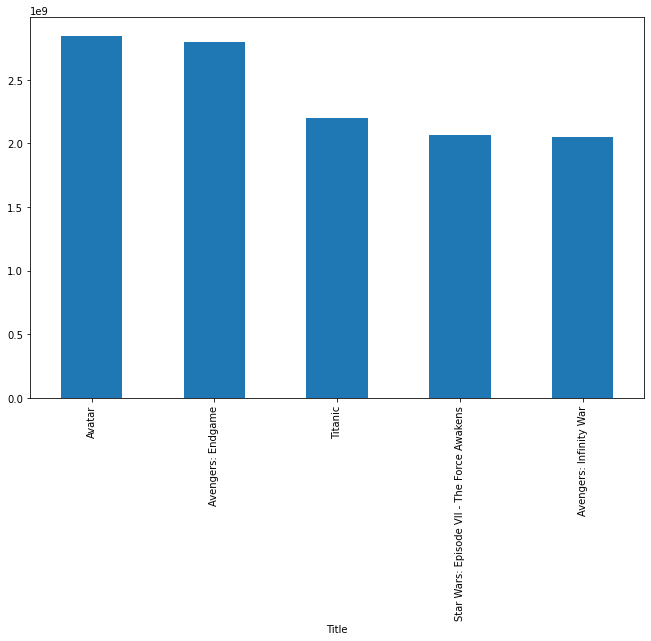

In [44]:
top_movie_box["Total Box Office"].plot.bar(figsize=(11,7))

### Top Profit (Total Profit)

In [45]:
top_movie_prof = new_df1.sort_values(by=["Profit"],ascending=False).copy()
top_movie_prof = top_movie_prof.reset_index(drop=True)
top_movie_prof = top_movie_prof.set_index("Title")
top_movie_prof = top_movie_prof.iloc[:5,:]
top_movie_prof

,Year,Decade,Length,Rating,Studio,Main Actor,Director,Genres,Total Box Office,Rank in Year,Budget,Profit,Length Range,Critics RT,Audience RT,IMDB Rating,Year's Top Movie According to Critics,Year's #1 Box Office,Year's Top 5 Box Office,titleID
Title,,,,,,,,,,,,,,,,,,,,
Avatar,2009,2000s,162,PG-13,Twentieth Century Fox,Sam Worthington,James Cameron,"Action,Adventure,Fantasy",2847246203,1.0,237000000,2610246203,150 - 180,83,82,7.8,Up,1,1,tt0499549
Avengers: Endgame,2019,2010s,181,PG-13,Marvel Studios,Robert Downey Jr.,Anthony Russo,"Action,Adventure,Drama",2797501328,1.0,356000000,2441501328,180+,94,90,8.4,Parasite,1,1,tt4154796
Titanic,1997,90s,194,PG-13,Twentieth Century Fox,Leonardo DiCaprio,James Cameron,"Drama,Romance",2201647264,1.0,200000000,2001647264,180+,88,69,7.8,L.A. Confidential,1,1,tt0120338
Star Wars: Episode VII - The Force Awakens,2015,2010s,138,PG-13,Lucasfilm,Daisy Ridley,J.J. Abrams,"Action,Adventure,Sci-Fi",2069521700,1.0,245000000,1824521700,120 - 150,93,85,7.8,Mad Max: Fury Road,1,1,tt2488496
Avengers: Infinity War,2018,2010s,149,PG-13,Marvel Studios,Robert Downey Jr.,Anthony Russo,"Action,Adventure,Sci-Fi",2048359754,1.0,321000000,1727359754,120 - 150,85,91,8.4,Black Panther,1,1,tt4154756


### Top 5 Total profit graph

<AxesSubplot:xlabel='Title'>

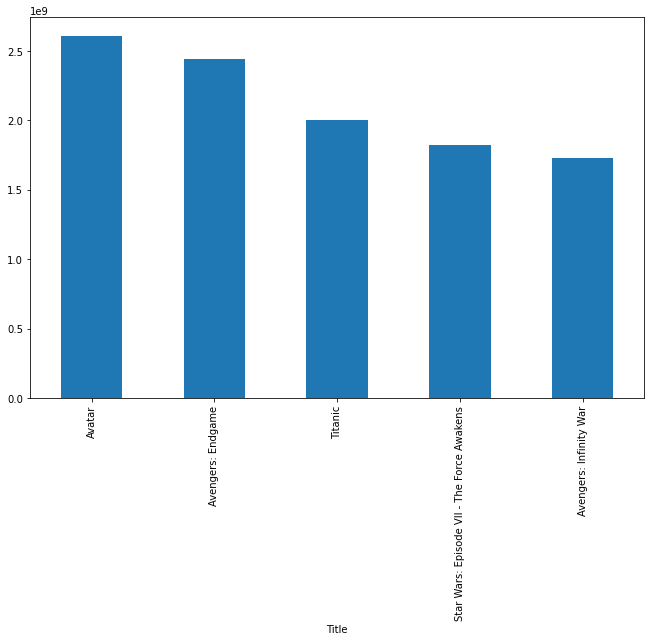

In [46]:
top_movie_prof["Profit"].plot.bar(figsize=(11,7))

#### When looking at the Top 5 Box Office/Profit movies of all time we get the same list. Avatar is first on both of these list. Therefore, this would make Avatar the most successful movie of all time.

### --------
## Decades

In [47]:
dec = new_df1.copy()

In [48]:
dec = pd.pivot_table(new_df1, values='Total Box Office', index=['Decade'], aggfunc = np.sum)

### Total Box Office per Decade

<AxesSubplot:xlabel='Decade'>

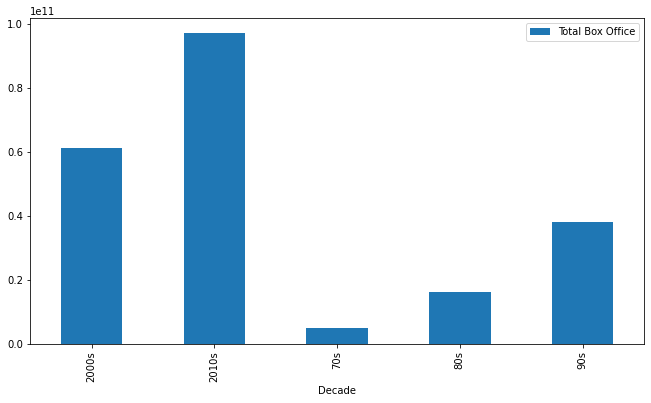

In [49]:
dec.plot.bar(figsize=(11,6))

### Average Box Office per Decade

<AxesSubplot:xlabel='Decade'>

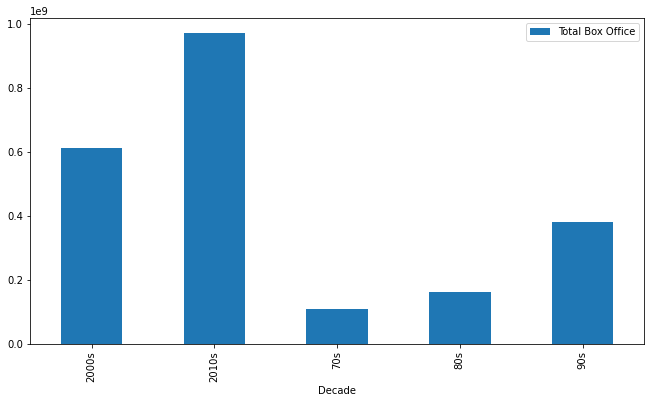

In [50]:
dec = pd.pivot_table(new_df1, values='Total Box Office', index=['Decade'], aggfunc = np.mean)
dec.plot.bar(figsize=(11,6))

### Top Year (average box office)

In [51]:
year_ = pd.pivot_table(new_df1, values='Total Box Office', index=['Year'], aggfunc = np.mean)
year_["Total Box Office"] = year_["Total Box Office"].astype(int)
year_ = year_.sort_values(by="Total Box Office",ascending=False)
year_.head(1)

,Total Box Office
Year,
2019,1325235478


#### Now with so many streaming services available, you may think that maybe not as much people are going to the movies before. However, this graphs says otherwise. The top two decades with the most box office are the 2000s and the 2010s. 2019 is the year with the highest average box office, averaging more than 200 million than the second place year, 2015.

### -------
## Actors

In [52]:
actors = new_df1.copy()
actors["Main Actor"].value_counts()

Tom Cruise          16
Tom Hanks           13
Harrison Ford       10
Will Smith           9
Daniel Radcliffe     8
                    ..
Ben Cross            1
Ben Burtt            1
Gene Hackman         1
Dan Castellaneta     1
Sam Worthington      1
Name: Main Actor, Length: 213, dtype: int64

In [53]:
actors = actors.sort_values(by=["Total Box Office"],ascending=False)
actors = actors.reset_index(drop=True)
actors = actors.set_index("Main Actor")


### Actors w/ Most Box Office

<AxesSubplot:xlabel='Main Actor'>

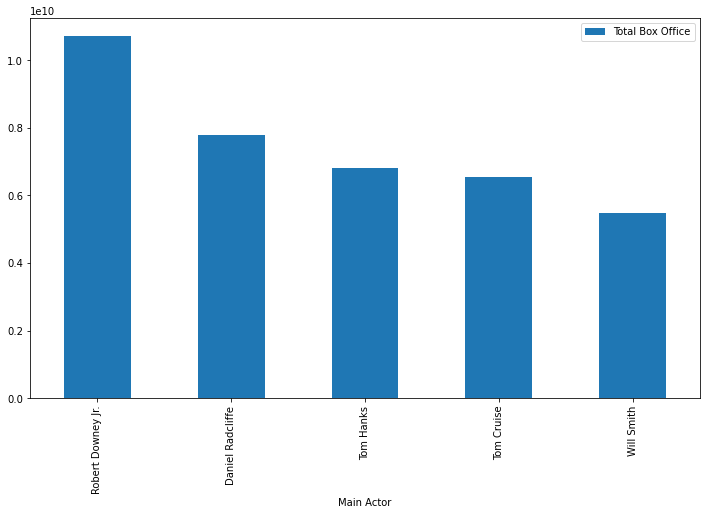

In [54]:
a = pd.pivot_table(actors, values='Total Box Office', index=['Main Actor'], aggfunc = np.sum)

a = a.sort_values(by=["Total Box Office"],ascending=False)
a.head(5).plot.bar(figsize=(12,7))

In [55]:
a.head(5)

,Total Box Office
Main Actor,
Robert Downey Jr.,10716055646
Daniel Radcliffe,7776602036
Tom Hanks,6810093829
Tom Cruise,6528902289
Will Smith,5473339639


### Actors w/ Most Box Office, Averages (only actors with most appearances)

<AxesSubplot:xlabel='Main Actor'>

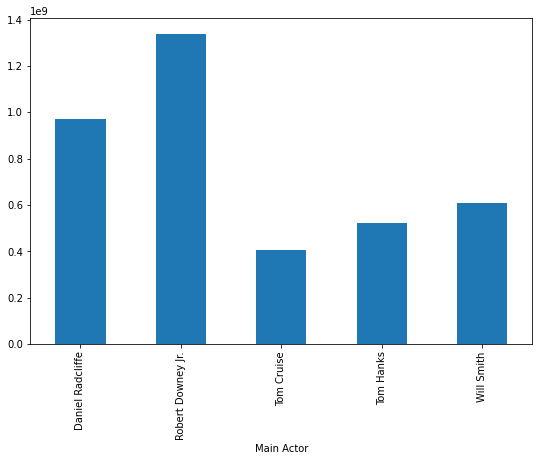

In [56]:
actors = new_df1.copy()
actors = actors[(actors["Main Actor"] == "Robert Downey Jr.") | (actors["Main Actor"] == "Daniel Radcliffe") | 
       (actors["Main Actor"] == "Tom Hanks") |(actors["Main Actor"] == "Tom Cruise") |
      (actors["Main Actor"] == "Will Smith")]
actors.groupby(["Main Actor"])["Total Box Office"].mean().plot.bar(figsize = (9,6))

#a.sort_values(by=["Total Box Office"],ascending=False).head()

### Top Actors & Their Averages (only actors with most appearances)

<AxesSubplot:xlabel='Main Actor'>

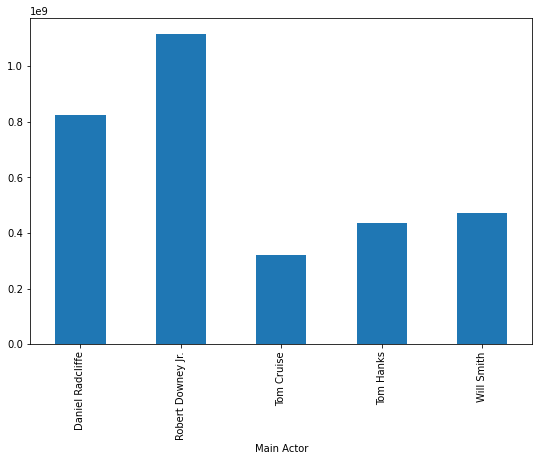

In [57]:
actors = new_df1.copy()
actors = actors[(actors["Main Actor"] == "Robert Downey Jr.") | (actors["Main Actor"] == "Daniel Radcliffe") | 
       (actors["Main Actor"] == "Tom Hanks") |(actors["Main Actor"] == "Tom Cruise") |
      (actors["Main Actor"] == "Will Smith")]
actors.groupby(["Main Actor"])["Profit"].mean().plot.bar(figsize = (9,6))

#### From these graphs we see that although Tom Cruise(16) and Tom Hanks(13) have been on this list the most amount, we can see that Robert Downey Jr. is the most successful actor. He has generated more than 10 Billion at the Box Office and averages about 1 billion profit

### -----
## Directors

In [58]:
direc = new_df1.copy()
direc["Director"].value_counts()

Steven Spielberg    14
Michael Bay          8
Robert Zemeckis      8
Richard Donner       7
Peter Jackson        7
                    ..
Paul Brickman        1
Joel Zwick           1
Floyd Mutrux         1
Irvin Kershner       1
Norman Jewison       1
Name: Director, Length: 237, dtype: int64

### Only directors with most appearances

### Top Directors & Their Box Office (Average)

In [59]:
direc = direc[(direc["Director"] == "Steven Spielberg") | (direc["Director"] == "Robert Zemeckis") |
             (direc["Director"] == "Michael Bay") | (direc["Director"] == "Peter Jackson") |
             (direc["Director"] == "Richard Donner")]
direc = pd.pivot_table(direc, values='Total Box Office', index=['Director'], aggfunc = np.mean)
direc = direc.sort_values(by="Total Box Office",ascending=False)
direc["Total Box Office"] = direc["Total Box Office"].astype(int)

<AxesSubplot:xlabel='Director'>

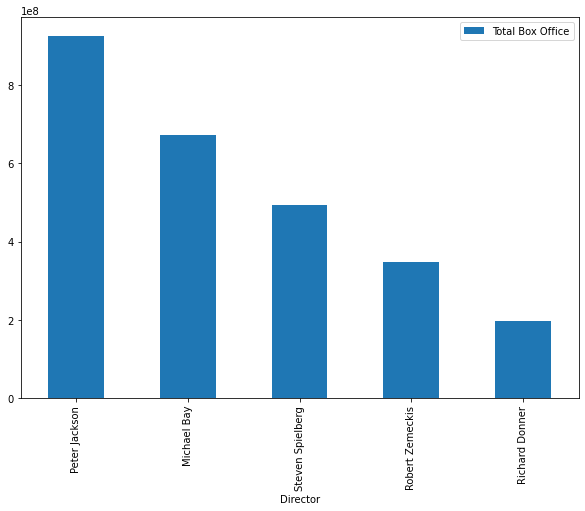

In [60]:
direc.plot.bar(figsize=(10,7))

### Their Average Profit

<AxesSubplot:xlabel='Director'>

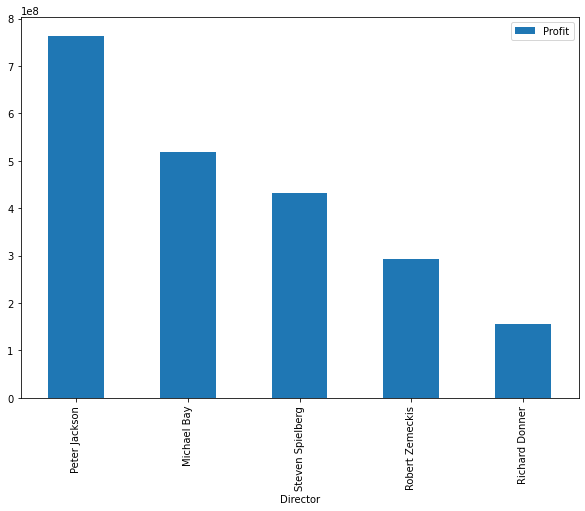

In [61]:
direc = new_df1.copy()
direc = direc[(direc["Director"] == "Steven Spielberg") | (direc["Director"] == "Robert Zemeckis") |
             (direc["Director"] == "Michael Bay") | (direc["Director"] == "Peter Jackson") |
             (direc["Director"] == "Richard Donner")]
direc = pd.pivot_table(direc, values='Profit', index=['Director'], aggfunc = np.mean)
direc = direc.sort_values(by="Profit",ascending=False)
direc["Profit"] = direc["Profit"].astype(int)

direc.plot.bar(figsize=(10,7))

#### Although Steven Spielberg has the most movies on this list. If we look at averages among the top 5 directors with the most movies on this list we see that Peter Jackson is technically the most successful because on average he produces the most Box Office money.

### -----
## Studios

In [62]:
stdio = new_df1.copy()

In [63]:
stdio = pd.pivot_table(stdio, values='Profit', index=['Studio'], aggfunc = np.mean)
stdio = stdio.sort_values(by="Profit",ascending=False)
stdio["Profit"] = stdio["Profit"].astype(int)

### Studio Profit (Averages)

In [64]:
stdio.head(10)

,Profit
Studio,
Marvel Studios,1142812219
Mandeville Films,1104434525
Illumination Entertainment,1020122396
Beijing Dengfeng International Culture Communications Company,840225439
Lucasfilm,826776488
Fairview Entertainment,791554929
Blue Sky Studios,782244782
Avi Arad Productions,756085151
Color Force,735011746


<AxesSubplot:xlabel='Studio'>

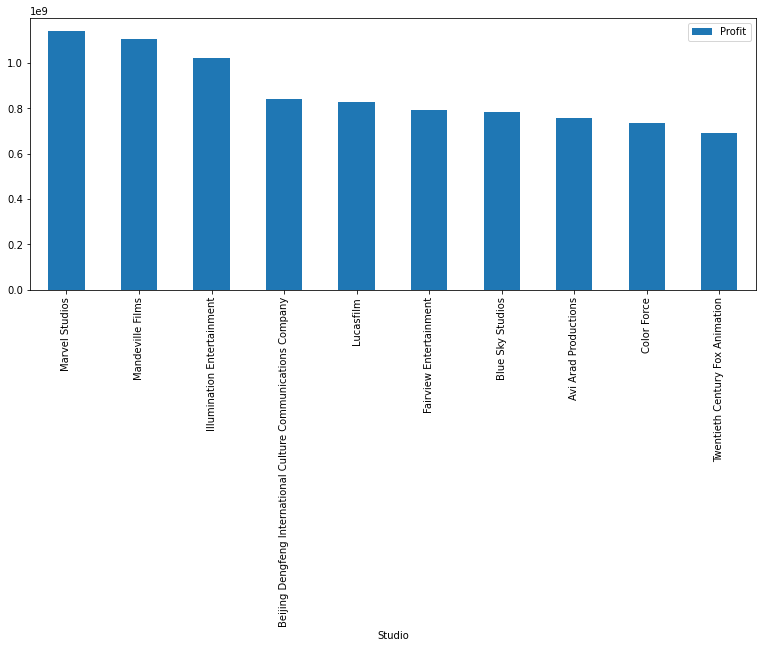

In [65]:
stdio.head(10).plot.bar(figsize=(13,5))

#### On average Marvel Studios' movies seem to make the most profit, which makes sense considering that the 2010s & 2000s decade has had the most Box Office and Marvel movies have been very popular over the last 20 years. Therefore, Marvel Studio is the most successful by averaging the most profit per movie.

### --------
## Rating

In [66]:
rating = new_df1.copy()

### Average Box Office per Rating Category

In [67]:
rating = pd.pivot_table(rating, values='Total Box Office', index=['Rating'], aggfunc = np.mean)
rating = rating.sort_values(by="Total Box Office",ascending=False)
rating["Total Box Office"] = rating["Total Box Office"].astype(int)

In [68]:
rating

,Total Box Office
Rating,
Not Rated,870325439
PG-13,696072883
G,437427633
PG,391975847
R,259779776
Unrated,159822


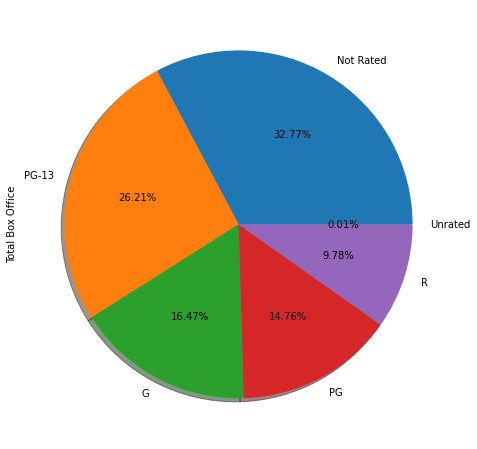

In [69]:
rating2 = rating.plot.pie(y="Total Box Office", legend=False, \
                   autopct='%1.2f%%',shadow=True, startangle=0,figsize=(12,8))

#### Pie graphs shows distribution of box office between the rating categories.

### ---------
## Combinations

   ### Actor/Director

In [70]:
act_dir= new_df1.copy()
act_dir = pd.pivot_table(act_dir, values='Total Box Office', index=['Main Actor', "Director"], aggfunc = np.sum)

### Total Box Office

In [71]:
act_dir = act_dir.sort_values(by="Total Box Office",ascending=False)
act_dir["Total Box Office"] = act_dir["Total Box Office"].astype(int)
act_dir

,,Total Box Office
Main Actor,Director,
Robert Downey Jr.,Anthony Russo,4845861082
Daniel Radcliffe,David Yates,4195991640
Daisy Ridley,J.J. Abrams,3147754289
Elijah Wood,Peter Jackson,2991216079
Robert Downey Jr.,Joss Whedon,2921625055
...,...,...
Woody Allen,Woody Allen,38287178
Bill Bixby,Norman Tokar,36853000
Paul Le Mat,Floyd Mutrux,35000000


### Actor/Director/Studio (Total Box Office)

In [72]:
act_dir_std = new_df1.copy()
act_dir_std = pd.pivot_table(act_dir_std, values='Total Box Office', index=['Main Actor', "Director", "Studio"], aggfunc = np.sum)
act_dir_std = act_dir_std.sort_values(by="Total Box Office",ascending=False)
act_dir_std["Total Box Office"] = act_dir_std["Total Box Office"].astype(int)
act_dir_std

,,,Total Box Office
Main Actor,Director,Studio,
Robert Downey Jr.,Anthony Russo,Marvel Studios,4845861082
Daniel Radcliffe,David Yates,Warner Bros.,4195991640
Elijah Wood,Peter Jackson,New Line Cinema,2991216079
Robert Downey Jr.,Joss Whedon,Marvel Studios,2921625055
Sam Worthington,James Cameron,Twentieth Century Fox,2847246203
...,...,...,...
Woody Allen,Woody Allen,Jack Rollins & Charles H. Joffe Productions,38287178
Bill Bixby,Norman Tokar,Walt Disney Productions,36853000
Paul Le Mat,Floyd Mutrux,Columbia Pictures,35000000


### Actor/Director/Studio/Genres (Total Box Office)

In [73]:
act_dir_std_g = new_df1.copy()
act_dir_std_g = pd.pivot_table(act_dir_std_g, values='Total Box Office', index=['Main Actor', "Director", "Studio",'Genres'], aggfunc = np.sum)
act_dir_std_g = act_dir_std_g.sort_values(by="Total Box Office",ascending=False)
act_dir_std_g["Total Box Office"] = act_dir_std_g["Total Box Office"].astype(int)
act_dir_std_g

,,,,Total Box Office
Main Actor,Director,Studio,Genres,
Elijah Wood,Peter Jackson,New Line Cinema,"Action,Adventure,Drama",2991216079
Robert Downey Jr.,Joss Whedon,Marvel Studios,"Action,Adventure,Sci-Fi",2921625055
Sam Worthington,James Cameron,Twentieth Century Fox,"Action,Adventure,Fantasy",2847246203
Robert Downey Jr.,Anthony Russo,Marvel Studios,"Action,Adventure,Drama",2797501328
Kristen Bell,Chris Buck,Walt Disney Animation Studios,"Adventure,Animation,Comedy",2731535033
...,...,...,...,...
Woody Allen,Woody Allen,Jack Rollins & Charles H. Joffe Productions,"Comedy,Romance",38287178
Bill Bixby,Norman Tokar,Walt Disney Productions,"Comedy,Family,Western",36853000
Paul Le Mat,Floyd Mutrux,Columbia Pictures,Drama,35000000


#### Based off these results we can say the best combos involving director/act/studio/genres either involves the most sucessful actor Robert Downey Jr or the most successful director Peter Jackson.

### ---------
## Critics & Movies

In [74]:
movie_top = new_df1.copy()
movie_top.head()

,Title,Year,Decade,Length,Rating,Studio,Main Actor,Director,Genres,Total Box Office,...,Budget,Profit,Length Range,Critics RT,Audience RT,IMDB Rating,Year's Top Movie According to Critics,Year's #1 Box Office,Year's Top 5 Box Office,titleID
0,Avengers: Endgame,2019,2010s,181,PG-13,Marvel Studios,Robert Downey Jr.,Anthony Russo,"Action,Adventure,Drama",2797501328,...,356000000,2441501328,180+,94,90,8.4,Parasite,1,1,tt4154796
1,The Lion King,2019,2010s,118,PG,Walt Disney Pictures,Donald Glover,Jon Favreau,"Adventure,Animation,Drama",1667635327,...,260000000,1407635327,90 - 120,52,88,6.8,Parasite,0,1,tt6105098
2,Frozen II,2019,2010s,103,PG,Walt Disney Animation Studios,Kristen Bell,Chris Buck,"Adventure,Animation,Comedy",1450026933,...,150000000,1300026933,90 - 120,78,92,6.8,Parasite,0,1,tt4520988
3,Spider-Man: Far from Home,2019,2010s,129,PG-13,Columbia Pictures,Tom Holland,Jon Watts,"Action,Adventure,Sci-Fi",1131927996,...,160000000,971927996,120 - 150,90,95,7.5,Parasite,0,1,tt6320628
4,Captain Marvel,2019,2010s,123,PG-13,Walt Disney Pictures,Brie Larson,Anna Boden,"Action,Adventure,Sci-Fi",1128462972,...,160000000,968462972,120 - 150,79,45,6.8,Parasite,0,1,tt4154664


In [75]:
movie_top = movie_top[movie_top["Title"] == movie_top["Year's Top Movie According to Critics"]]
movie_top.head()
# New dataframe movie_top only contains movie that were the year's #1 rated movie

,Title,Year,Decade,Length,Rating,Studio,Main Actor,Director,Genres,Total Box Office,...,Budget,Profit,Length Range,Critics RT,Audience RT,IMDB Rating,Year's Top Movie According to Critics,Year's #1 Box Office,Year's Top 5 Box Office,titleID
11,Black Panther,2018,2010s,134,PG-13,Marvel Studios,Chadwick Boseman,Ryan Coogler,"Action,Adventure,Sci-Fi",1347597973,...,200000000,1147597973,120 - 150,96,79,7.3,Black Panther,0,1,tt1825683
67,Gravity,2013,2010s,91,PG-13,Warner Bros.,Sandra Bullock,Alfonso Cuarón,"Drama,Sci-Fi,Thriller",723192705,...,100000000,623192705,90 - 120,97,80,7.7,Gravity,0,0,tt1454468
90,Toy Story 3,2010,2010s,103,G,Walt Disney Pictures,Tom Hanks,Lee Unkrich,"Adventure,Animation,Comedy",1066970811,...,200000000,866970811,90 - 120,99,89,8.2,Toy Story 3,1,1,tt0435761
105,Up,2009,2000s,96,PG,Pixar Animation Studios,Edward Asner,Pete Docter,"Adventure,Animation,Comedy",735099102,...,175000000,560099102,90 - 120,98,90,8.2,Up,0,0,tt1049413
110,The Dark Knight,2008,2000s,152,PG-13,Warner Bros.,Christian Bale,Christopher Nolan,"Action,Crime,Drama",1005973645,...,185000000,820973645,150 - 180,94,94,9.0,The Dark Knight,1,1,tt0468569


#### Pie graph shows how many times the top box office movie has been the #1 rated movie in the same year

<AxesSubplot:ylabel="Year's #1 Box Office">

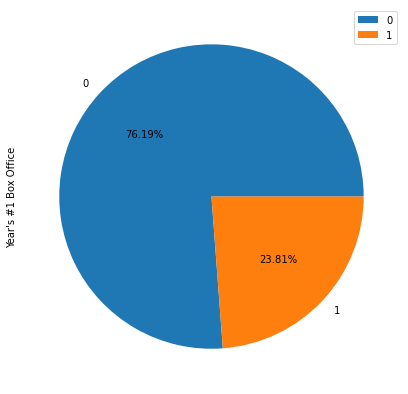

In [76]:
movie_top["Year's #1 Box Office"].value_counts().plot.pie(legend=True,autopct='%1.2f%%',figsize=(18,7))


#### About 76% of time the top box office movie of the year IS NOT the highest critically rated movie of the year.
#### Only about 24% that is the case.

In [77]:
movie_critic_rate = new_df1.copy()

### Looking at all movies and their averages audience / critics ratings

In [78]:
movie_critic_rate = movie_critic_rate[["Title","Critics RT", "Audience RT", "IMDB Rating"]]
movie_critic_rate
# * Dataframe contains all movies on this list *

,Title,Critics RT,Audience RT,IMDB Rating
0,Avengers: Endgame,94,90,8.4
1,The Lion King,52,88,6.8
2,Frozen II,78,92,6.8
3,Spider-Man: Far from Home,90,95,7.5
4,Captain Marvel,79,45,6.8
...,...,...,...,...
442,The Return of the Pink Panther,89,82,7.1
443,Funny Lady,38,56,6.4
444,The Apple Dumpling Gang,56,60,6.2
445,Aloha Bobby and Rose,70,60,6.0


In [79]:
movie_critic_rate.mean()

Critics RT     70.970917
Audience RT    73.015660
IMDB Rating     7.072260
dtype: float64

### Looking at only the top box office movie of every year

In [80]:
num_one_movie = new_df1.copy()

In [81]:
num_one_movie = num_one_movie[num_one_movie["Year's #1 Box Office"] == 1]
num_one_movie = num_one_movie[["Title","Critics RT","Audience RT", "IMDB Rating"]]
num_one_movie.head()

# * DataFrame contains only movies that were #1 at the box office for their year *

,Title,Critics RT,Audience RT,IMDB Rating
0,Avengers: Endgame,94,90,8.4
10,Avengers: Infinity War,85,91,8.4
20,Star Wars: Episode VIII - The Last Jedi,91,42,7.0
30,Captain America: Civil War,90,89,7.8
40,Star Wars: Episode VII - The Force Awakens,93,85,7.8


In [82]:
num_one_movie.mean()

Critics RT     82.111111
Audience RT    81.111111
IMDB Rating     7.733333
dtype: float64

### Looking at only the 10th rank box office movie of every year

In [83]:
tenth_movie = new_df1.copy()

In [84]:
tenth_movie = tenth_movie[tenth_movie["Rank in Year"] == 10]
tenth_movie = tenth_movie[["Title","Critics RT","Audience RT", "IMDB Rating"]]
tenth_movie.head()

# * DataFrame contains movies ranked #10 at the box office for their year *

,Title,Critics RT,Audience RT,IMDB Rating
9,Jumanji: The Next Level,71,87,6.7
19,Fantastic Beasts: The Crimes of Grindelwald,36,54,6.5
29,Wonder Woman,93,83,7.4
39,Suicide Squad,26,59,5.9
49,The Martian,91,91,8.0


In [85]:
tenth_movie.mean()

Critics RT     66.863636
Audience RT    71.363636
IMDB Rating     6.922727
dtype: float64

#### I think based off this I think having a good audience rating is what really helps a movie succeed.

### ---------
## Length Range Affect on A Movie's Success

In [86]:
length_budget = new_df1.copy()

In [87]:
import matplotlib.cm as cm

### Relationship between Length Range / Budget

<AxesSubplot:xlabel='Budget', ylabel='Length Range'>

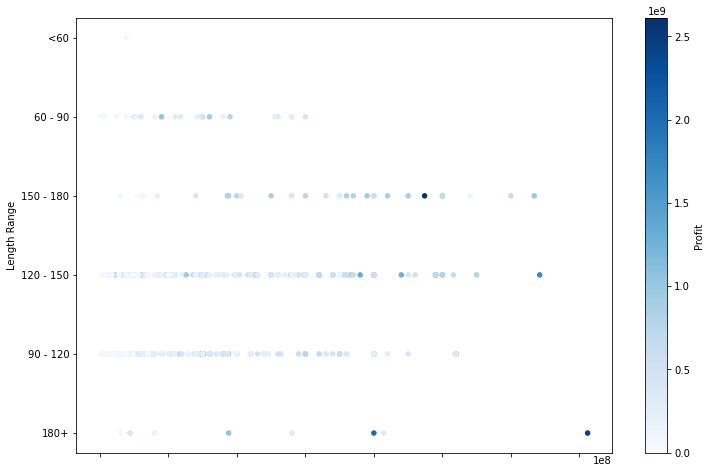

In [88]:
length_budget.plot.scatter(x="Budget", y="Length Range", c="Profit", cmap=cm.Blues, figsize=(12,8))

### Profit per Length Range (total)

In [89]:
length_budget = pd.pivot_table(length_budget, values='Profit', index=['Length Range'], aggfunc = np.sum)
length_budget = length_budget.sort_values(by="Profit",ascending=False)
length_budget["Profit"] = length_budget["Profit"].astype(int)

<AxesSubplot:xlabel='Length Range'>

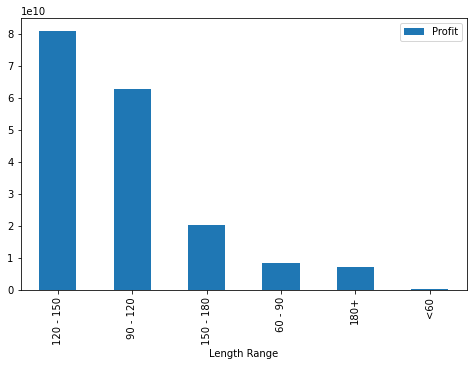

In [90]:
length_budget.plot.bar(figsize=(8,5))

### Profit per Length Range (average)

In [91]:
length_budget = pd.pivot_table(length_budget, values='Profit', index=['Length Range'], aggfunc = np.mean)
length_budget = length_budget.sort_values(by="Profit",ascending=False)
length_budget["Profit"] = length_budget["Profit"].astype(int)

<AxesSubplot:xlabel='Length Range'>

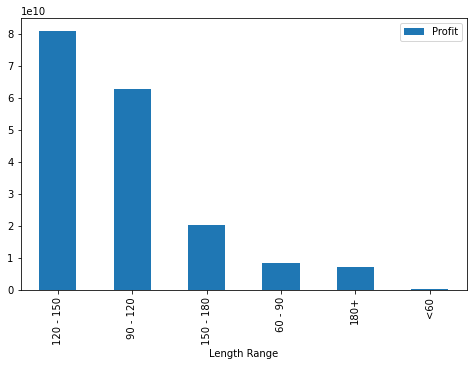

In [92]:
length_budget.plot.bar(figsize=(8,5))

#### From this information it looks like people still enjoy watching long movies.

### -----------
### ML Algorithms

### Predict if Steven Spielberg's next movie reach year's top 5 in box office ?

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [94]:
scaler = StandardScaler()
le = LabelEncoder()

In [95]:
c1 = new_df1.copy()

In [96]:
c1["Director"] = le.fit_transform(c1["Director"])
le_dict = dict(zip(le.classes_,le.transform(le.classes_)))


x_train_set = c1[["Budget", "Year","Director"]]
y_train_set = c1["Year's Top 5 Box Office"]

In [97]:
new_x = pd.Series(dtype=pd.StringDtype())
new_x["Director"] = le_dict.get("Steven Spielberg")
new_x["Year"] = 2021
new_x["Budget"] = 100000000

In [98]:
new_x

Director          217
Year             2021
Budget      100000000
dtype: int64

In [99]:
new_x_train_set = scaler.fit_transform(x_train_set)
new_x_2 = scaler.transform(pd.DataFrame([new_x]))

m = KNeighborsClassifier(n_neighbors = 10)
m.fit(X = new_x_train_set, y = y_train_set)
m.predict(X = new_x_2)  

array([0])

#### 0 = It will not be top 5 box office

In [100]:
x_train_set2 = (x_train_set - x_train_set.mean()) / x_train_set.std()

new_x2 = (new_x - x_train_set.mean()) / x_train_set.std()
temp = np.sqrt(((x_train_set2 - new_x2) ** 2).sum(axis = 1))
temp2 = temp.sort_values()
ten = temp2.index[:10]
c1.loc[ten]["Year's Top 5 Box Office"].value_counts()

0    8
1    2
Name: Year's Top 5 Box Office, dtype: int64

#### 80% chance it won't make it to the year's top 5 box office.

#### --------

### Perdict How Much Christopher Nolan's Last Movie 'Tenet' Made

In [101]:
c2 = new_df1.copy()

In [102]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
c2["Director"] = le.fit_transform(c2["Director"])
l_dictionary = dict(zip(le.classes_,le.transform(le.classes_)))
c2["Rating"] = le.fit_transform(c2["Rating"])
l_dictionary2 = dict(zip(le.classes_,le.transform(le.classes_)))
c2["Length Range"] = le.fit_transform(c2["Length Range"])
l_dictionary3 = dict(zip(le.classes_,le.transform(le.classes_)))

x_train = c2[["Director", "Budget", "Critics RT", "Audience RT", "IMDB Rating", "Rating", "Year","Length Range"]]
y_train = c2["Total Box Office"]

In [104]:
new_x = pd.Series(dtype=pd.StringDtype())
new_x["Director"] = l_dictionary.get("Christopher Nolan")
new_x["Year"] = 2020
new_x["Budget"] = 205000000
new_x["Rating"] = l_dictionary2.get("PG-13")
new_x["Critics RT"] = 70
new_x["Audience Rating"] = 76
new_x["IMDB Rating"] = 7.4
new_x["Length Range"] = l_dictionary3.get("150 - 180")

In [105]:

x_train_2 = scaler.fit_transform(x_train)
new_x_2 = scaler.transform(pd.DataFrame([new_x]))

m = KNeighborsRegressor(n_neighbors=10)
m.fit(X = x_train_2, y = y_train)
int(m.predict(X = new_x_2))

337679478

#### ML Perdiction: 337,679,478

#### Actual Box Office of "Tenet" : 363,700,000

### Perdict The Rating of the Movie Soul

In [106]:
c3 = new_df1.copy()

In [107]:
c3["Director"] = le.fit_transform(c3["Director"])
l_dictionary = dict(zip(le.classes_,le.transform(le.classes_)))
c3["Rating"] = le.fit_transform(c3["Rating"])
l_dictionary2 = dict(zip(le.classes_,le.transform(le.classes_)))
c3["Length Range"] = le.fit_transform(c3["Length Range"])
l_dictionary3 = dict(zip(le.classes_,le.transform(le.classes_)))
c3["Main Actor"] = le.fit_transform(c3["Main Actor"])
l_dictionary4 = dict(zip(le.classes_,le.transform(le.classes_)))
c3["Studio"] = le.fit_transform(c3["Studio"])
l_dictionary5 = dict(zip(le.classes_,le.transform(le.classes_)))


x_train = c3[["Director", "Critics RT", "Main Actor", "IMDB Rating", "Rating", "Year","Length Range", "Studio"]]
y_train = c3["Audience RT"]

In [108]:
new_x = pd.Series(dtype=pd.StringDtype())
new_x["Director"] = l_dictionary.get("Pete Docter")
new_x["Year"] = 2020
new_x["Rating"] = l_dictionary2.get("PG")
new_x["Critics RT"] = 95
new_x["Main Actor"] = l_dictionary4.get("Jamie Foxx",(len(l_dictionary4)+1))
new_x["IMDB Rating"] = 8.1
new_x["Length Range"] = l_dictionary3.get("90 - 120")
new_x["Studio"] = l_dictionary5.get("Walt Disney Pictures")

In [109]:
x_train_2 = scaler.fit_transform(x_train)
new_x_2 = scaler.transform(pd.DataFrame([new_x]))

m = KNeighborsRegressor(n_neighbors=10)
m.fit(X = x_train_2, y = y_train)
int(m.predict(X = new_x_2))
# SOUL 2020

92

### ML Perdiction: 92
### Actual Audience Rating: 88

#### --------